# install and import packages to the enviroment

In [1]:
#install packages required for the enviroment.
#!pip install chart_studio
#!pip install autoviz
#!pip install xlrd
#!pip install -q sklearn

#import packages to the enviroment
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from autoviz.AutoViz_Class import AutoViz_Class
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
h2o.init()


import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

print("Packages installed in enviroment successfully")

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.221-b11, mixed mode)
  Starting server from C:\Users\MSI\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\MSI\AppData\Local\Temp\tmph8fl847m
  JVM stdout: C:\Users\MSI\AppData\Local\Temp\tmph8fl847m\h2o_MSI_started_from_python.out
  JVM stderr: C:\Users\MSI\AppData\Local\Temp\tmph8fl8

H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_MSI_e7bj7w
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.766 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


Packages installed in enviroment successfully


 # Load Dataset and inspect

Now that we have installed and imported the packages that we will use for the enviroment. lets go ahead and load the dataset for inspection and analysis.

In [2]:
#load the dataset
df = pd.read_csv("country_wise_latest.csv")

print("'Dataset information'")
print()
df.info()

'Dataset information'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region         

In [3]:
#columns in the dataset
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [4]:
#describe the dataset
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


Lets examine the top 5 countries with max confirmed numbers.

In [5]:
#max number of confirmed, recovered, deaths and active.
maxConfirmed = df.loc[df["Confirmed"].idxmax()]
maxRecovered = df.loc[df["Recovered"].idxmax()]
maxDeaths = df.loc[df["Deaths"].idxmax()]
maxActive = df.loc[df["Active"].idxmax()]

print("-----------Max Confirmed number--------------")
print(maxConfirmed)
print()
print("-----------Max Deaths number-----------------")
print(maxDeaths)
print()
print("-----------Max Recovered number--------------")
print(maxRecovered)
print()
print("-----------Max Active number-----------------")
print(maxActive)

-----------Max Confirmed number--------------
Country/Region                  US
Confirmed                  4290259
Deaths                      148011
Recovered                  1325804
Active                     2816444
New cases                    56336
New deaths                    1076
New recovered                27941
Deaths / 100 Cases            3.45
Recovered / 100 Cases         30.9
Deaths / 100 Recovered       11.16
Confirmed last week        3834677
1 week change               455582
1 week % increase            11.88
WHO Region                Americas
Name: 173, dtype: object

-----------Max Deaths number-----------------
Country/Region                  US
Confirmed                  4290259
Deaths                      148011
Recovered                  1325804
Active                     2816444
New cases                    56336
New deaths                    1076
New recovered                27941
Deaths / 100 Cases            3.45
Recovered / 100 Cases         30.9
Deaths 

Lets visualise the top 10 confirmed countries in descending order

In [6]:
#dislay confirmed in first 10 countries 
df = df.sort_values("Confirmed", ascending = False)
fig = px.bar(df.head(10), y = "Confirmed", x = "Country/Region",
            text = "Confirmed", color = "Country/Region")
#total values bar with 2 precision values
fig.update_traces(texttemplate = "%{text:.2s}", textposition = "outside")
#set fontsize and uniformText
fig.update_layout(uniformtext_minsize = 8)
#rotate label 45 degrees
fig.update_layout(xaxis_tickangle=-45)
fig.update_layout(legend_title_text='confirmed (Covid-19)')
fig.update_layout(title_text='Top 10 Confirmed cases in the world')
fig


Top 10 Deaths reported countries in the world

In [7]:
#dislay deaths in first 10 countries 
df = df.sort_values("Deaths", ascending = False)
fig = px.bar(df.head(10), y = "Deaths", x = "Country/Region",
            text = "Deaths", color = "Country/Region")
#total values bar with 2 precision values
fig.update_traces(texttemplate = "%{text:.2s}", textposition = "outside")
#set fontsize and uniformText
fig.update_layout(uniformtext_minsize = 8)
#rotate label 45 degrees
fig.update_layout(xaxis_tickangle=-45)
fig.update_layout(legend_title_text='Deaths (Covid-19)')
fig.update_layout(title_text='Top 10 Death cases in the world')
fig

Top 10 recovered countries in the world

In [8]:
#dislay Recovered in first 10 countries 
df = df.sort_values("Recovered", ascending = False)
fig = px.bar(df.head(10), y = "Recovered", x = "Country/Region",
            text = "Recovered", color = "Country/Region")
#total values bar with 2 precision values
fig.update_traces(texttemplate = "%{text:.2s}", textposition = "outside")
#set fontsize and uniformText
fig.update_layout(uniformtext_minsize = 8)
#rotate label 45 degrees
fig.update_layout(xaxis_tickangle=-45)
fig.update_layout(legend_title_text='Recovered (Covid-19)')
fig.update_layout(title_text='Top 10 Recovered cases in the world')
fig

Scatter matrix plot between the confirmed, deaths, recovered and active cases

In [9]:
#Scatter matrix plot between the confirmed, deaths and recovery category.
fig = px.scatter_matrix(df.head(10), dimensions=["Confirmed","Deaths","Recovered","Active"], color = "Country/Region")
fig

Scatter matrix of new cases, new deaths and new recovery.

In [10]:
#scatter matrix of new cases, new deaths and new recovery.
fig = px.scatter_matrix(df.head(10), dimensions = ["New cases","New deaths","New recovered"], color = "Country/Region")
fig

Automatic visualisation of the entire data to find hidden patterns or insight.

Shape of your Data Set: (187, 15)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  9
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    15 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 10


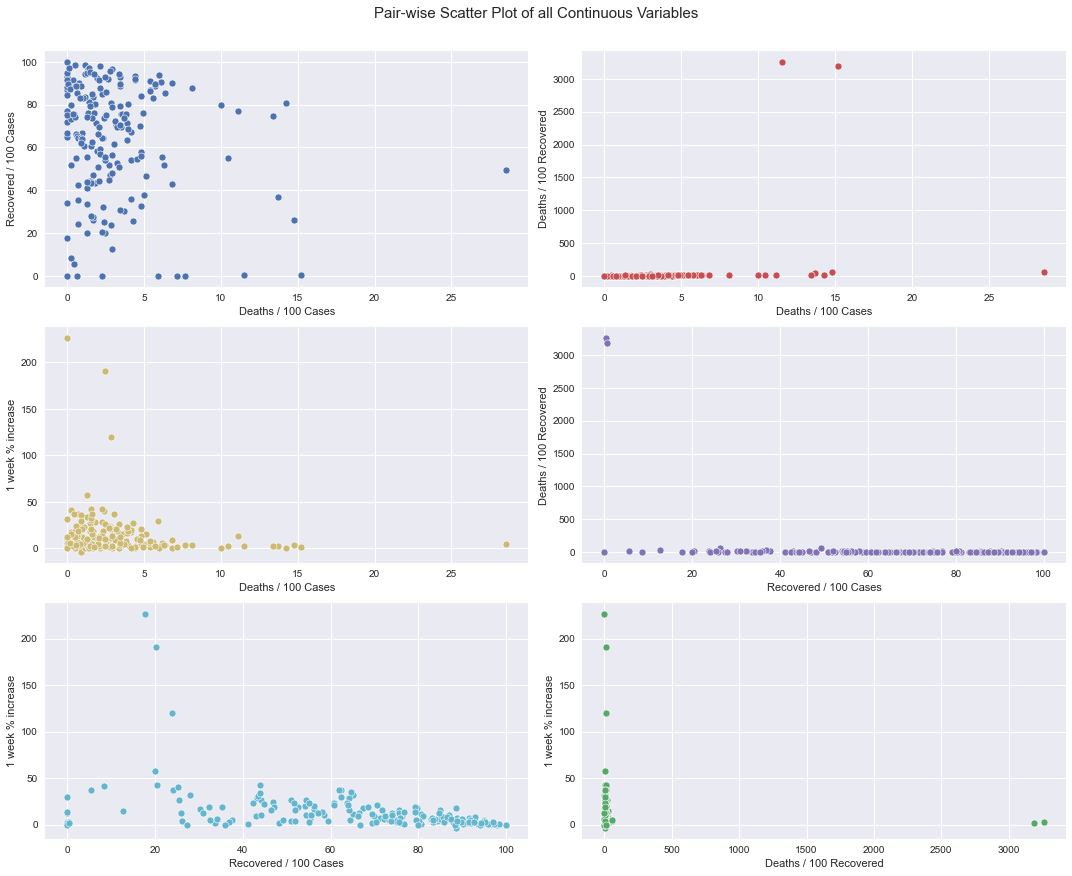

Could not draw Distribution Plot


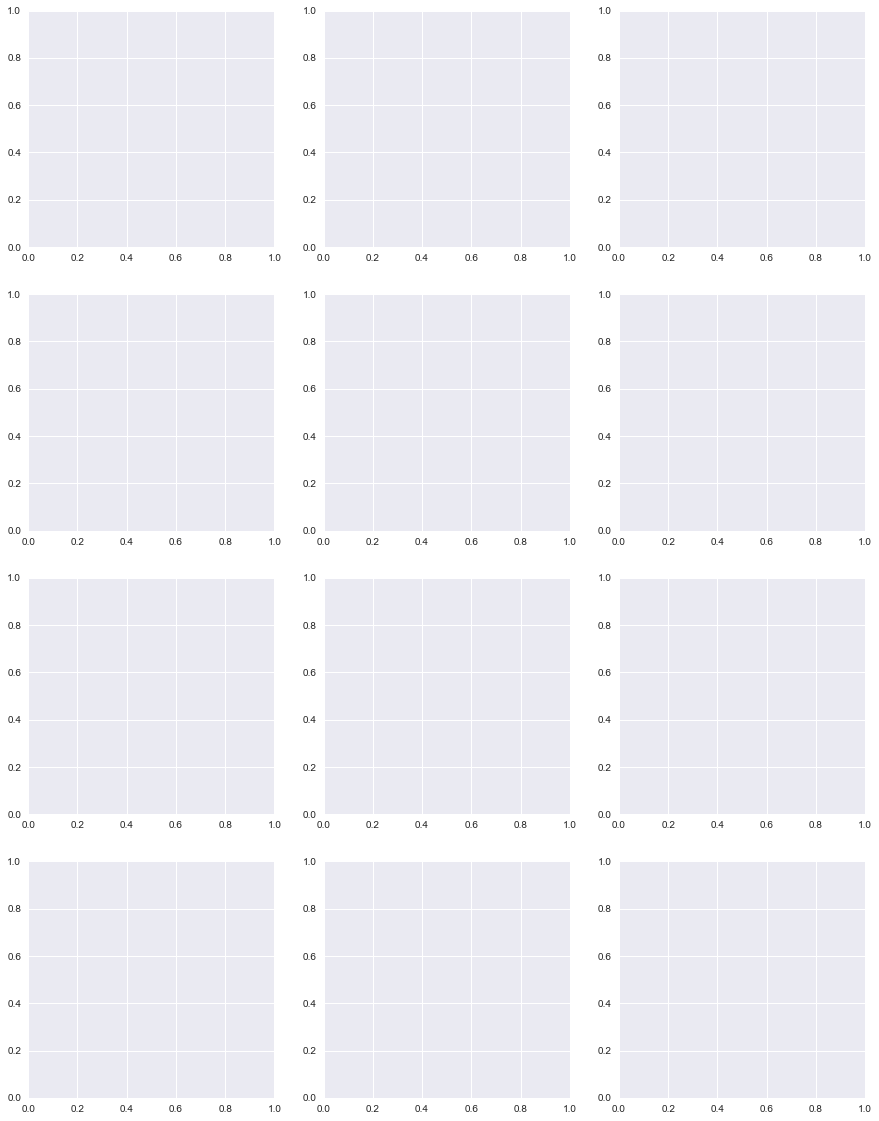

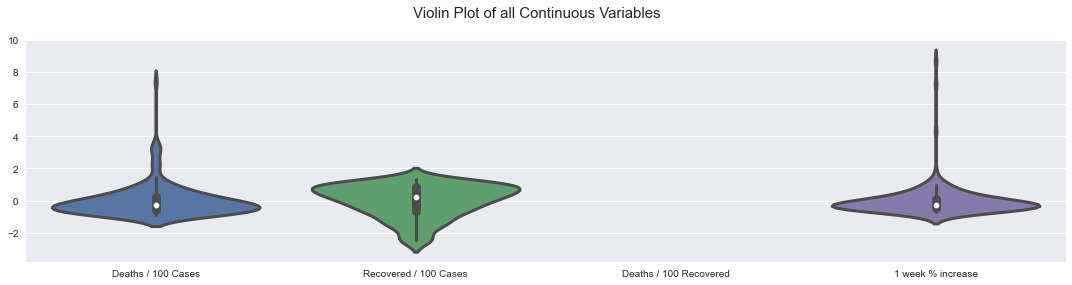

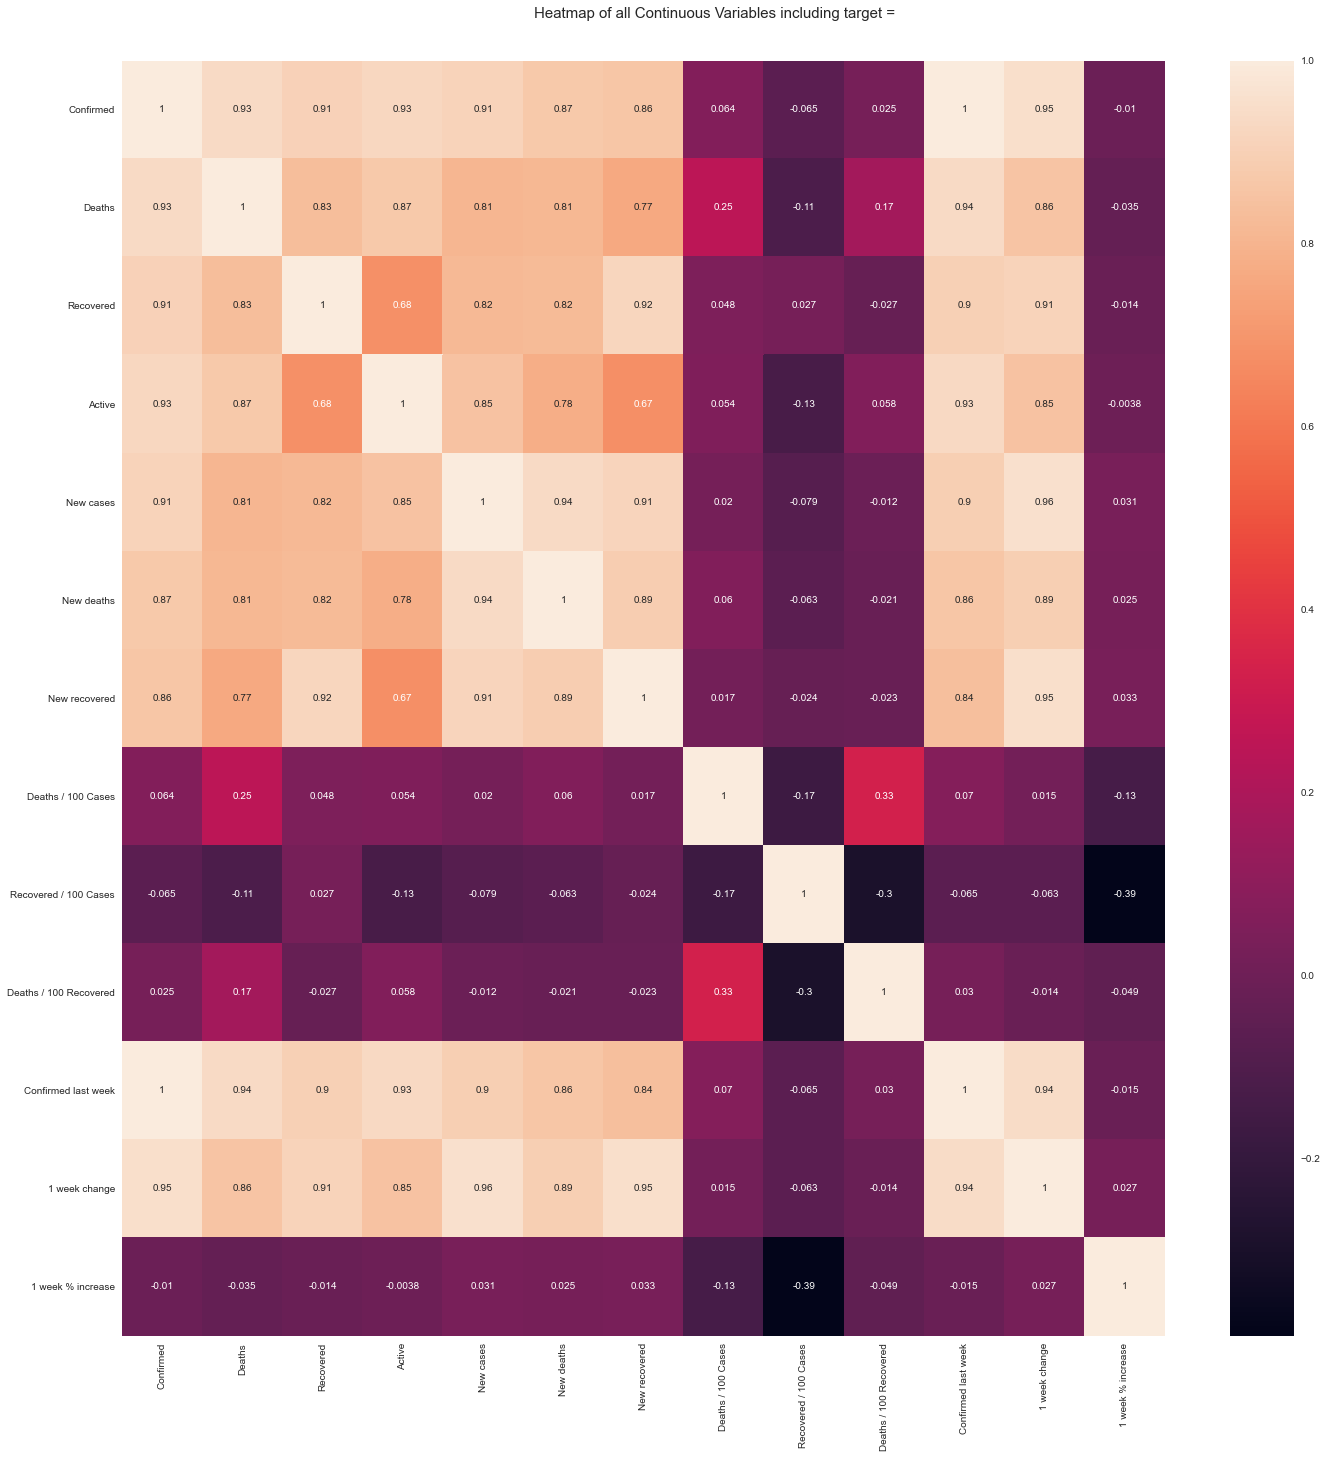

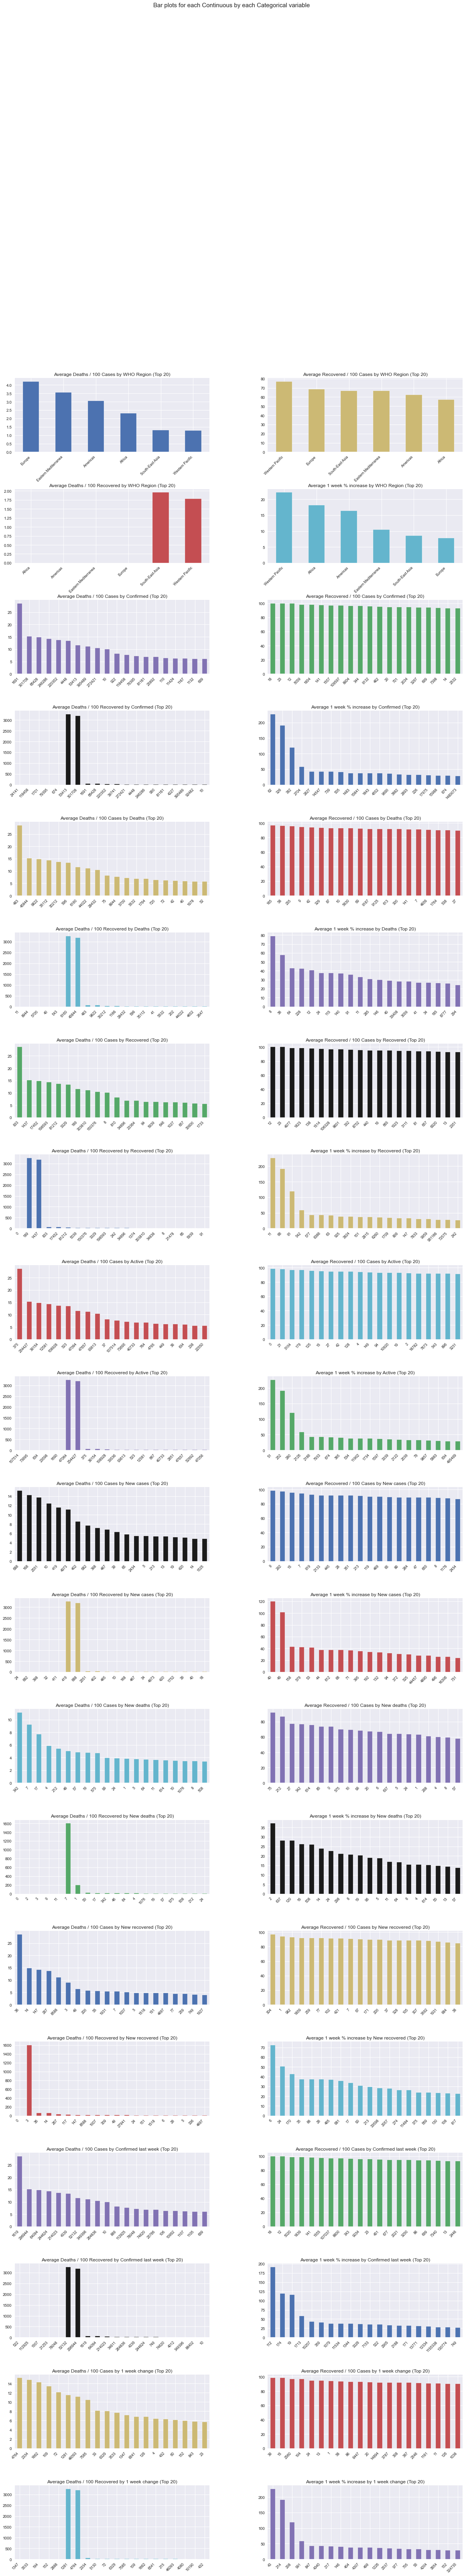

Time to run AutoViz (in seconds) = 16.693

 ###################### VISUALIZATION Completed ########################


In [11]:
av = AutoViz_Class()
df = "country_wise_latest.csv"
sep = ","
draftAutoViz = av.AutoViz(
            df,
            sep = ",",
            depVar="",
            dfte = None,
            header = 0,
            verbose = 0,
            lowess = False,
            chart_format = "svg",
            max_cols_analyzed=30,
            max_rows_analyzed=1500000,
            )

### create a prediction

In [12]:
df = pd.read_csv("country_wise_latest.csv")

df = df.sort_values("Confirmed", ascending = False)
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,Dominica,18,0,18,0,0,0,0,0.00,100.00,0.00,18,0,0.00,Americas
140,Saint Kitts and Nevis,17,0,15,2,0,0,0,0.00,88.24,0.00,17,0,0.00,Americas
68,Greenland,14,0,13,1,1,0,0,0.00,92.86,0.00,13,1,7.69,Europe
75,Holy See,12,0,12,0,0,0,0,0.00,100.00,0.00,12,0,0.00,Europe


In [13]:
#split dataset to train and test dataset
x_train, y_train = train_test_split(df, test_size=0.2)
x_test, y_test = train_test_split(df, test_size = 0.2)
print(len(x_train), "x_train Dataset")
print(len(y_train), "y_train Dataset")
print(len(x_test), "x_test Dataset")
print(len(y_test), "y_test Dataset")

149 x_train Dataset
38 y_train Dataset
149 x_test Dataset
38 y_test Dataset


In [14]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train

array([['Guinea-Bissau', 1954, 26, ..., 5, 0.26, 'Africa'],
       ['Uzbekistan', 21209, 121, ..., 4060, 23.67, 'Europe'],
       ['Namibia', 1843, 8, ..., 499, 37.13, 'Africa'],
       ...,
       ['Pakistan', 274289, 5842, ..., 8193, 3.08,
        'Eastern Mediterranean'],
       ['Poland', 43402, 1676, ..., 3019, 7.48, 'Europe'],
       ['Czechia', 15516, 373, ..., 1418, 10.06, 'Europe']], dtype=object)

In [15]:
df = h2o.import_file("country_wise_latest.csv")

df2 = df.sort(1, ascending=False)
df2

Parse progress: |█████████████████████████████████████████████████████████| 100%


Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
US,4.29026e+06,148011,1.3258e+06,2.81644e+06,56336,1076,27941,3.45,30.9,11.16,3.83468e+06,455582,11.88,Americas
Brazil,2.44238e+06,87618,1.84664e+06,508116,23284,614,33728,3.59,75.61,4.74,2.11865e+06,323729,15.28,Americas
India,1.48007e+06,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1.15534e+06,324735,28.11,South-East Asia
Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96,2.87,333029,14894,4.47,Americas
United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.6,Europe
Iran,293606,15912,255144,22550,2434,212,1931,5.42,86.9,6.24,276202,17404,6.3,Eastern Mediterranean


In [16]:
train,test,valid = df2.split_frame(ratios=[.7, .15])

x = train.columns
y = "Confirmed"
x.remove(y)



train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

aml = H2OAutoML(max_models=20, seed = 1)
aml.train(x=x,y=y,training_frame=train)

AutoML progress: |
15:11:24.398: AutoML: XGBoost is not available; skipping it.

██████████████
15:13:07.440: Skipping training of model GBM_5_AutoML_20210523_151124 due to exception: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_5_AutoML_20210523_151124.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 119.0.


██████████████████████████████████████
15:19:34.297: StackedEnsemble_BestOfFamily_AutoML_20210523_151124 [StackedEnsemble best (built using top model from each algorithm type)] failed: java.lang.RuntimeException: java.lang.ArrayIndexOutOfBoundsException: 591


15:19:36.331: StackedEnsemble_AllModels_AutoML_20210523_151124 [StackedEnsemble all (built using all AutoML models)] failed: java.lang.RuntimeException: java.lang.ArrayIndexOutOfBoundsException: 2361

████| 100%


In [17]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,mean_per_class_error,logloss,rmse,mse,auc,aucpr
DeepLearning_1_AutoML_20210523_151124,0.991525,6.20505,0.995354,0.990729,nan,nan
DeepLearning_grid__2_AutoML_20210523_151124_model_2,0.991525,18.1746,0.996047,0.99211,nan,nan
GBM_1_AutoML_20210523_151124,0.991525,11.5482,0.990043,0.980185,nan,nan
GBM_grid__1_AutoML_20210523_151124_model_6,0.991525,4.73023,0.985257,0.97073,nan,nan
GBM_grid__1_AutoML_20210523_151124_model_5,1,5.21482,0.993694,0.987427,nan,nan
GBM_grid__1_AutoML_20210523_151124_model_2,1,16.8994,0.994507,0.989045,nan,nan
DeepLearning_grid__2_AutoML_20210523_151124_model_1,1,12.8504,0.999828,0.999656,nan,nan
GBM_grid__1_AutoML_20210523_151124_model_3,1,4.59093,0.987039,0.974247,nan,nan
GBM_3_AutoML_20210523_151124,1,4.79748,0.98762,0.975393,nan,nan
DeepLearning_grid__3_AutoML_20210523_151124_model_2,1,19.461,0.999996,0.999993,nan,nan


In [18]:
test = test.drop("Confirmed")
test
predictions = aml.leader.predict(test)

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [19]:
predictions.describe()

Rows:36
Cols:119




,predict,p10,p17,p18,p24,p62,p86,p99,p110,p116,p141,p226,p265,p289,p344,p350,p354,p378,p382,p505,p509,p674,p701,p739,p1060,p1100,p1167,p1455,p1483,p1557,p1691,p1701,p1770,p1783,p1843,p1879,p1954,p2019,p2034,p2181,p2305,p2532,p2827,p2893,p3071,p3196,p3297,p3664,p3882,p4227,p4548,p4552,p4599,p4880,p7235,p7398,p7413,p8844,p8904,p9132,p9690,p9764,p10213,p10498,p10621,p11424,p13761,p14547,p15035,p15655,p15841,p15988,p17110,p17975,p20558,p20887,p21209,p24141,p25892,p33296,p33624,p36263,p37390,p39741,p41180,p43402,p45309,p50299,p50838,p53413,p59177,p61442,p63985,p64156,p64379,p67096,p67251,p71181,p77058,p79395,p82040,p109597,p112585,p116458,p167416,p220352,p226225,p246286,p257101,p268934,p272421,p274289,p293606,p301708,p347923,p389717,p452529,p1480073,p2442375
type,enum,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,,0.00016353909202609677,0.00661551470655862,0.0002836714388956398,0.0008215717910839128,0.0008284654688926839,0.00017770008553554545,0.0018054556669740709,0.002102410604018704,0.0003664132523388532,0.00020421592308956434,0.006052311293200229,0.008302101182696607,0.0007329879565813082,0.00012054087084295319,0.00046368965874031575,0.0025378649205792486,0.0003306697822850863,0.00470919174211849,0.006774785872315968,0.00018839786046150026,4.7330326516623605e-06,0.008270115026880262,0.001778964132394081,0.005558086916578595,0.007929674232455244,0.006311595992149389,0.005637699248437027,9.206307506685371e-05,0.005336415520840041,8.209831236007522e-05,0.0006721407105263373,0.009519203794502913,0.0004120654852714437,7.989856991743726e-05,0.003803649687948006,0.0011622598852006167,0.003891059168921342,0.0008263524539214933,0.007668829684949128,0.009264945153198704,0.00015194317199145963,0.0002705365745088264,0.0019677436399641876,0.0003279877317118175,0.00478774053558828,0.0023169611535185275,0.000529871813154684,0.008021493650179365,0.00015676056197908022,0.007891115611387183,0.008295803379245513,0.0001788120639258354,0.0061290864320816775,0.004533062342384054,0.003961031372693441,0.0018289416591866982,0.0072992958703276285,0.005142543019287564,0.0025136116034389527,0.006547725341466033,0.0005585148567138304,0.00039542144960511976,0.0007975682405964689,0.002781082223237617,0.002109588394188846,0.0007301466497801897,0.0028970177716086776,0.005632499107763838,0.006463418775207564,0.0062467949474399355,0.006143677129247131,0.002998723727197182,0.004355732734590982,0.008109297566541765,0.0006703387786051703,0.004968024416284008,0.005013796103200007,0.005825954053989148,0.0047929068778341105,0.0012007093868048587,0.0002430303046073798,0.005834040099030371,0.004301172788831373,0.0001245785487393624,0.0008050146258014957,0.0056057695929474585,0.00021804095373148915,0.008726102366824246,0.00032224930875241994,0.002313241433084009,0.00017866843338574525,0.0005935875459202882,0.0013357832593893447,0.0013884065077596779,0.0018135212210052566,0.0013976014104982873,0.0047728611365348336,0.005025608095110488,0.003171751354952044,0.0006385082508965181,0.0030053741484880143,0.006373226912516444,0.0001856163587268083,0.0012077900464084696,0.0001807581049616517,0.007500842090821573,0.003613102064460671,0.0036514027606673934,0.003302099707273754,0.005441572997119615,0.005989120455006083,0.00044100858704005627,0.0009703542522165096,1.3174037326926184e-05,0.0010362621356434815,0.0014210776334312547,0.0014540294055515265,0.0006760191882398077
mean,,0.008649500961384735,0.008102108121068645,0.009856949869950662,0.0